In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

housing_data = pd.read_csv("housing.csv")
housing_data_mod = housing_data.drop(columns=["ocean_proximity"])
housing_data_mod

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


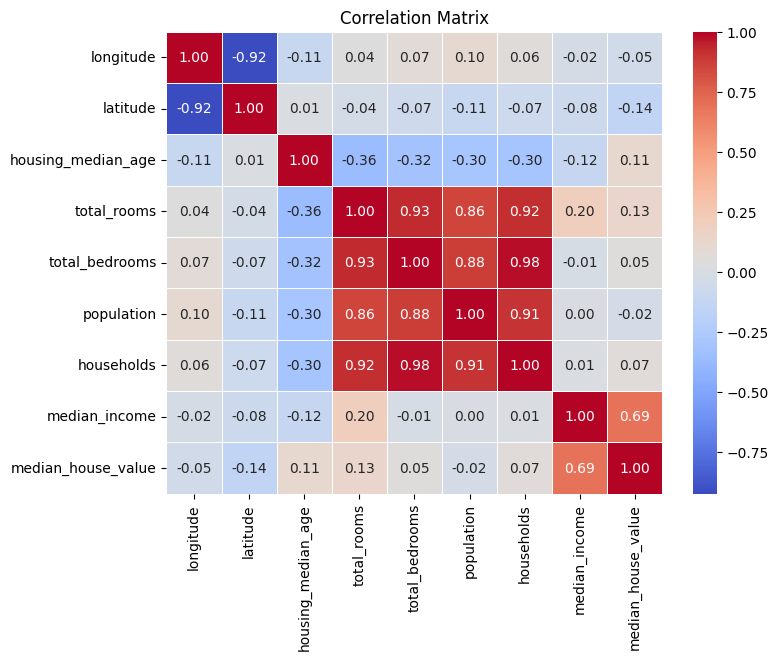

In [6]:
correlation_matrix = housing_data_mod.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


<h2> Linear regression model for predicting median house value income </h2>

In [15]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

df = pd.read_csv('housing.csv')


label_encoder = LabelEncoder()
df['ocean_proximity_encoded'] = label_encoder.fit_transform(df['ocean_proximity'])

df.drop(columns=['ocean_proximity'], inplace=True)

print("\nDataFrame after label encoding:")
print(df.head())

imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

print("\nDataFrame after median imputation:")
print(df_imputed.head())



DataFrame after label encoding:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0         8.3252            452600.0   
1      2401.0      1138.0         8.3014            358500.0   
2       496.0       177.0         7.2574            352100.0   
3       558.0       219.0         5.6431            341300.0   
4       565.0       259.0         3.8462            342200.0   

   ocean_proximity_encoded  
0                        3  
1                        3  
2                        3  
3              

In [30]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor


X = df_imputed.drop(columns=['median_house_value']) 
y = df_imputed['median_house_value']

col_names = X.columns
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled = sm.add_constant(X_scaled)

model = sm.OLS(y, X_scaled).fit()

print(model.summary())




                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     3998.
Date:                Wed, 10 Apr 2024   Prob (F-statistic):               0.00
Time:                        23:14:38   Log-Likelihood:            -2.5945e+05
No. Observations:               20640   AIC:                         5.189e+05
Df Residuals:                   20630   BIC:                         5.190e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.069e+05    484.978    426.526      0.0

In [34]:
## second model

new_X = X.drop(columns=["total_rooms", "households"])
sc = StandardScaler()
X_scaled = sc.fit_transform(new_X)
X_scaled = sm.add_constant(X_scaled)

model = sm.OLS(y, X_scaled).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     5063.
Date:                Wed, 10 Apr 2024   Prob (F-statistic):               0.00
Time:                        23:17:10   Log-Likelihood:            -2.5955e+05
No. Observations:               20640   AIC:                         5.191e+05
Df Residuals:                   20632   BIC:                         5.192e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.069e+05    487.319    424.477      0.0

In [43]:
## vif for the data
def calculate_vif(X, col_names):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = col_names
    vif_data["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
    return vif_data

X = sm.add_constant(X)
# print(X)
vif_df = calculate_vif(X, X.columns)
print("\nVariance Inflation Factor (VIF):")
print(vif_df)


Variance Inflation Factor (VIF):
                   Feature           VIF
0                    const  18267.014161
1                longitude      9.437476
2                 latitude      9.194543
3       housing_median_age      1.260604
4              total_rooms     12.203035
5           total_bedrooms     26.890771
6               population      6.335189
7               households     28.294325
8            median_income      1.704380
9  ocean_proximity_encoded      1.159113


<h2> We should remove one of the highly correlated column, so lets keep total_rooms only </h2>

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     4635.
Date:                Wed, 10 Apr 2024   Prob (F-statistic):               0.00
Time:                        23:37:35   Log-Likelihood:            -2.6012e+05
No. Observations:               20640   AIC:                         5.203e+05
Df Residuals:                   20632   BIC:                         5.203e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.069e+05    500.877    412.987      0.0

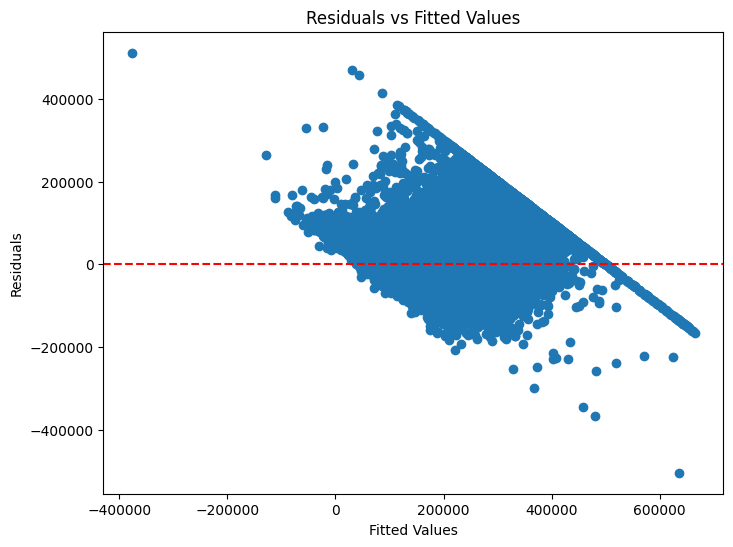

In [48]:
X = df_imputed.drop(columns=['median_house_value', 'total_bedrooms', 'households']) 
y = df_imputed['median_house_value']

sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled = sm.add_constant(X_scaled)

model = sm.OLS(y, X_scaled).fit()

print(model.summary())


plt.figure(figsize=(8, 6))
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()




Breusch-Pagan test for heteroscedasticity:
LM Statistic: 410.14994894678404
LM Test p-value: 1.5869978691735892e-84
F Statistic: 59.75761931229846
F Test p-value: 2.1791715701716817e-85
Kolmogorov-Smirnov test for normality:
Test Statistic: 0.5884205426356589
p-value: 0.0


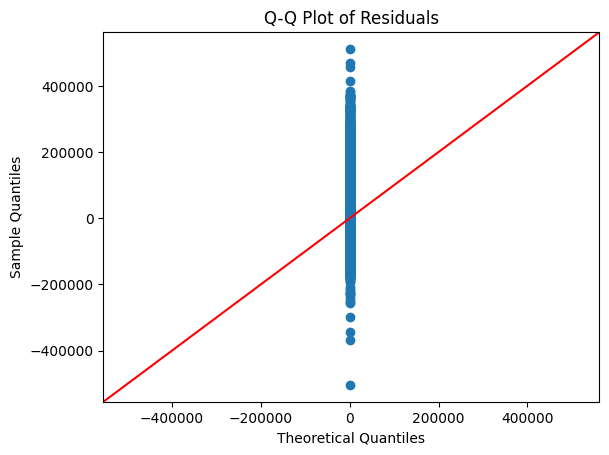

In [52]:
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import kstest

lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(model.resid, model.model.exog)

print("Breusch-Pagan test for heteroscedasticity:")
print("LM Statistic:", lm)
print("LM Test p-value:", lm_p_value)
print("F Statistic:", fvalue)
print("F Test p-value:", f_p_value)

ks_test_statistic, ks_p_value = kstest(model.resid, 'norm')
print("Kolmogorov-Smirnov test for normality:")
print("Test Statistic:", ks_test_statistic)
print("p-value:", ks_p_value)

# Q-Q plot
sm.qqplot(model.resid, line ='45')
plt.title('Q-Q Plot of Residuals')
plt.show()


<h2> The first model is better, aic value is smaller, the confidence interval and model summary are already mentioned above|  </h2>

<h1> Question 2 </h1>

In [54]:
import pandas as pd
import statsmodels.api as sm


data = pd.read_csv('binary.csv')

X = data[['gre', 'gpa', 'rank']]
y = data['admit']

X = sm.add_constant(X)

# Fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print the summary of the logistic regression model
print(result.summary())

odds_ratios = np.exp(result.params)
print('Odds ratios:')
print(odds_ratios)

Optimization terminated successfully.
         Current function value: 0.574302
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      396
Method:                           MLE   Df Model:                            3
Date:                Thu, 11 Apr 2024   Pseudo R-squ.:                 0.08107
Time:                        00:09:07   Log-Likelihood:                -229.72
converged:                       True   LL-Null:                       -249.99
Covariance Type:            nonrobust   LLR p-value:                 8.207e-09
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.4495      1.133     -3.045      0.002      -5.670      -1.229
gre            0.0023      0.

In [55]:
import pandas as pd
import statsmodels.api as sm

data = pd.read_csv('binary.csv')

data['gpa_rank_interaction'] = data['gpa'] * data['rank']

X = data[['gre', 'gpa', 'rank', 'gpa_rank_interaction']]
y = data['admit']

X = sm.add_constant(X)

logit_model = sm.Logit(y, X)
result = logit_model.fit()

print(result.summary())

odds_ratios = np.exp(result.params)
print('Odds ratios:')
print(odds_ratios)


Optimization terminated successfully.
         Current function value: 0.574168
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      395
Method:                           MLE   Df Model:                            4
Date:                Thu, 11 Apr 2024   Pseudo R-squ.:                 0.08129
Time:                        00:10:22   Log-Likelihood:                -229.67
converged:                       True   LL-Null:                       -249.99
Covariance Type:            nonrobust   LLR p-value:                 3.188e-08
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -4.3447      2.968     -1.464      0.143     -10.161       1.472

<h2>The new coefficient in the logistic regression model is for the interaction term gpa_rank_interaction. The odds ratio for this term is 0.892058, which means that for each unit increase in the product of GPA and rank, the odds of admission decrease by a factor of 0.892058, holding all other variables constant. In other words, the effect of GPA on admission becomes less positive as the rank of the undergraduate institution increases. This supports the hypothesis that GPA matters more for admission if the applicant is from a lower ranked institution.</h2>